## Lession 13: Stochastic Block Model

We will cover:
1. Stochastic Block Model (SBM) genration 
2. Generation of networks with Degree-Corrected Stochastic Block Model (DC-SBM)
3. Inference of community structure using SBM and DC-SBM

We will use *pysbm* package for this class https://github.com/funket/pysbm

You can find package in https://github.com/SaskaAloric/IntroCompleNeT2023/tree/main/Notebooks/Lession13 <br>
There is an additional data in this directory <br>
Directory *pysbm* should be included in the same directory as your jupyter notebook. No need to install. 

First we will import standard libraries we are using.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random as rn

We also need to import pysbm

In [2]:
import pysbm

### 2. Generate networks with SBM model

Networkx has a function for generating SBM networks: https://networkx.org/documentation/stable/reference/generated/networkx.generators.community.stochastic_block_model.html

#### 2.1 Network based on $\theta=(c,\vec{z},\mathcal{M})$ given by us

First we set $\theta=(c,\vec{z},\mathcal{M})$

In [3]:
c=3

In [4]:
community=[50,15,35]

In [5]:
z=[]
for i in range(0,100):
    if i<50:
        z.append(0)
    else:
        if i<65:
            z.append(1)
        else:
            z.append(2)

In [6]:
M=[[0.3,0.02,0.05],[0.02,0.7,0.03],[0.05,0.03,0.5]]

In [7]:
G=nx.stochastic_block_model(community,M)

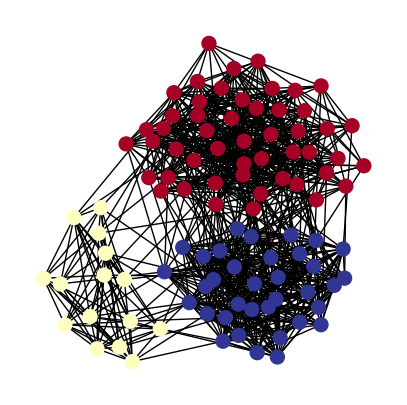

In [8]:
plt.figure(figsize =(5, 5))
pos=nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_size=100, cmap=plt.cm.RdYlBu, node_color=z)
nx.draw_networkx_edges(G,pos=pos)
plt.box(False)
plt.show()

In [9]:
degG={}
for v in G.nodes():
    degG[v]=G.degree(v)

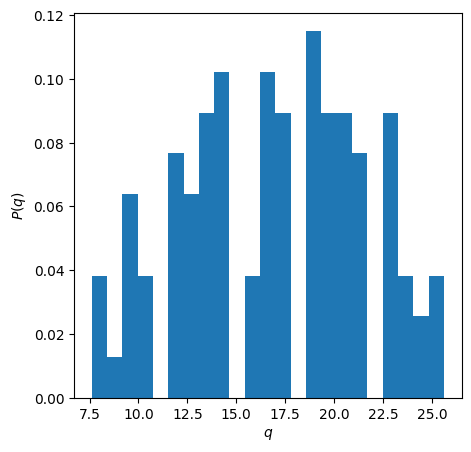

In [10]:
plt.figure(figsize=(5,5))
plt.xlabel("$q$")
plt.ylabel('$P(q)$')
plt.hist([v for v in degG.values()], bins=23, density=True, histtype='bar',align='left')
plt.show()

#### 2.2 SBM for Zachary’s Karate Club network 

Network shows the connections between the 34 members of Zachary's Karate Club. Edges represent interactions between members outside the club. The club split in two C1=[0,1,2,3,4,5,6,7,8,10,11,12,13,16,17,19,21] and C2=[9,14,15,18,20,22,23,24,25,26,27,28,29,30,31,32,33] 

In [11]:
ZKC=nx.karate_club_graph()

In [12]:
gt_membership = [ZKC.nodes[v]["club"] for v in ZKC.nodes()]
print(gt_membership)

['Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Officer', 'Mr. Hi', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Mr. Hi', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer', 'Officer']


Calculate group membership and node degree

In [13]:
C1=[]
C2=[]
z=[]
k=[]
for v in ZKC.nodes():
    k.append(G.degree(v))
    if gt_membership[v]=="Mr. Hi":
        C1.append(v)
        z.append(0)
    else:
        C2.append(v)
        z.append(1)
print(C1)
print(C2)
print(z)
print(k)
k.sort()
print(k[0],k[-1])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21]
[9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[15, 15, 19, 22, 12, 11, 12, 18, 12, 14, 17, 12, 18, 17, 18, 14, 15, 17, 15, 20, 21, 25, 17, 13, 14, 8, 20, 19, 16, 13, 14, 15, 22, 19]
8 25


In [14]:
cmn=[len(C1),len(C2)]

Calculate $\mathcal{M}$ from the data

In [15]:
M=[[0,0],[0,0]]

In [16]:
for v in ZKC.nodes():
    for u in ZKC.neighbors(v):
        if z[v]==z[u]:
            M[z[v]][z[v]]+=1
        else:
            M[z[v]][z[u]]+=1

Normalize a number of links to get a probabilities

In [17]:
M[0][0]=(1.0*M[0][0])/(1.0*len(C1)*(len(C1)-1))
M[1][1]=(1.0*M[1][1])/(1.0*len(C2)*(len(C2)-1))
M[0][1]=(1.0*M[0][1])/(1.0*len(C1)*len(C2))
M[1][0]=M[0][1]

In [18]:
print(M)

[[0.25735294117647056, 0.03806228373702422], [0.03806228373702422, 0.23529411764705882]]


In [19]:
ZKC_sbm=nx.stochastic_block_model(cmn,M)

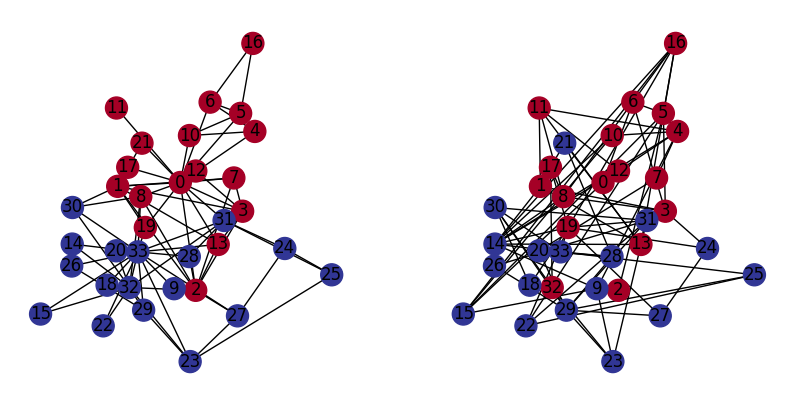

In [20]:
plt.figure(figsize =(10, 5))

plt.subplot(1,2,1)
posZKC=nx.kamada_kawai_layout(ZKC)
nx.draw_networkx_nodes(ZKC, pos=posZKC, node_size=250, cmap=plt.cm.RdYlBu, node_color=z)
nx.draw_networkx_edges(ZKC,pos=posZKC)
nx.draw_networkx_labels(ZKC,pos=posZKC)
plt.box(False)

plt.subplot(1,2,2)
nx.draw_networkx_nodes(ZKC_sbm, pos=posZKC, node_size=250, cmap=plt.cm.RdYlBu, node_color=z)
nx.draw_networkx_edges(ZKC_sbm,pos=posZKC)
nx.draw_networkx_labels(ZKC_sbm,pos=posZKC)
plt.box(False)
plt.show()

In [21]:
print("Number of edges in original ZKC network:", ZKC.number_of_edges())

Number of edges in original ZKC network: 78


In [22]:
print("Number of edges in SBM network for ZKC network:", ZKC_sbm.number_of_edges())

Number of edges in SBM network for ZKC network: 74


In [23]:
degZKC_sbm={}
for v in ZKC_sbm.nodes():
    degZKC_sbm[v]=ZKC_sbm.degree(v)
s=[v for v in degZKC_sbm.values()]
s.sort()
print(s[0],s[-1])

1 10


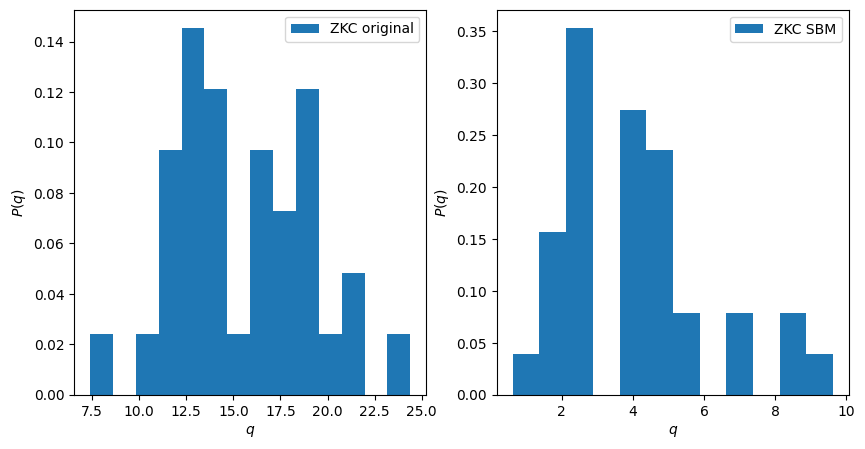

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel("$q$")
plt.ylabel('$P(q)$')
plt.hist(k, bins=14, density=True, histtype='bar',align='left', label="ZKC original")
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("$q$")
plt.ylabel('$P(q)$')
plt.hist([v for v in degZKC_sbm.values()], bins=12, density=True, histtype='bar',align='left', label="ZKC SBM")
plt.legend()
plt.show()

### 3. Generate networks with DC-SBM model

In [25]:
M=[[0,0],[0,0]]

In [26]:
for v in ZKC.nodes():
    for u in ZKC.neighbors(v):
        if z[v]==z[u]:
            M[z[v]][z[v]]+=1
        else:
            M[z[v]][z[u]]+=1

In [27]:
print(M)

[[70, 11], [11, 64]]


Calculate the degree of community

In [28]:
kc=[0,0]
for v in ZKC.nodes():
    kc[z[v]]=kc[z[v]]+ZKC.degree(v)
print(kc)

[81, 75]


We need to node propensity $\gamma_{i}=\frac{k_{i}}{kc_{z_{i}}}$

In [29]:
gamma=[]
for v in ZKC.nodes():
    x=(1.0*ZKC.degree(v))/(1.0*kc[z[v]])
    gamma.append(x)

Let us initialize our network

In [30]:
ZKC_dcsbm=nx.Graph()
for v in ZKC.nodes():
    ZKC_dcsbm.add_node(v)

In [31]:
for v in ZKC_dcsbm.nodes():
    for u in ZKC_dcsbm.nodes():
        if v>u:
            rx=gamma[v]*gamma[u]*M[z[v]][z[u]]
            ksi=np.random.poisson(lam=rx, size=None)
            if ksi>0:
                ZKC_dcsbm.add_edge(v,u)

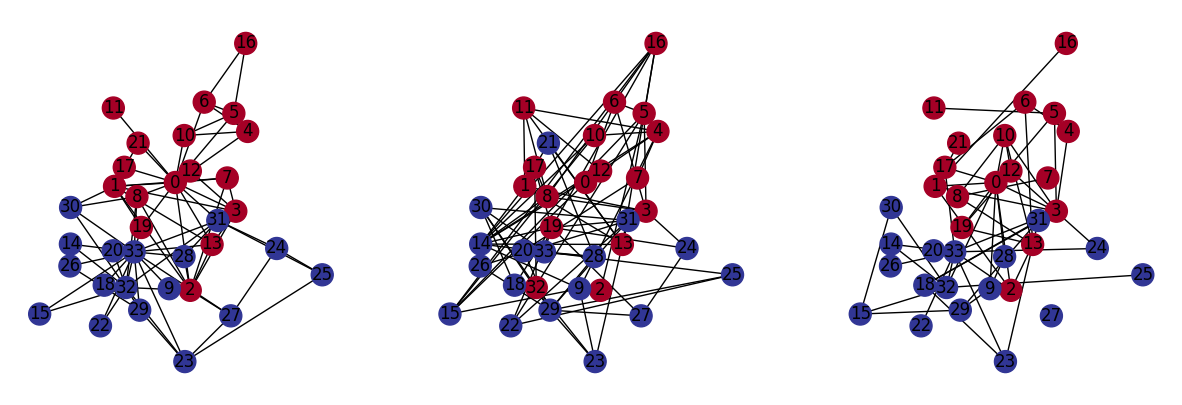

In [32]:
plt.figure(figsize =(15, 5))

plt.subplot(1,3,1)
nx.draw_networkx_nodes(ZKC, pos=posZKC, node_size=250, cmap=plt.cm.RdYlBu, node_color=z)
nx.draw_networkx_edges(ZKC,pos=posZKC)
nx.draw_networkx_labels(ZKC,pos=posZKC)
plt.box(False)

plt.subplot(1,3,2)
nx.draw_networkx_nodes(ZKC_sbm, pos=posZKC, node_size=250, cmap=plt.cm.RdYlBu, node_color=z)
nx.draw_networkx_edges(ZKC_sbm,pos=posZKC)
nx.draw_networkx_labels(ZKC_sbm,pos=posZKC)
plt.box(False)

plt.subplot(1,3,3)
nx.draw_networkx_nodes(ZKC_dcsbm, pos=posZKC, node_size=250, cmap=plt.cm.RdYlBu, node_color=z)
nx.draw_networkx_edges(ZKC_dcsbm,pos=posZKC)
nx.draw_networkx_labels(ZKC_dcsbm,pos=posZKC)
plt.box(False)


plt.show()

**Degree distribution of these three networks**

In [33]:
degZKC_dcsbm={}
for v in ZKC_dcsbm.nodes():
    degZKC_dcsbm[v]=ZKC_dcsbm.degree(v)
s=[v for v in degZKC_dcsbm.values()]
s.sort()
print(s[0],s[-1])

0 10


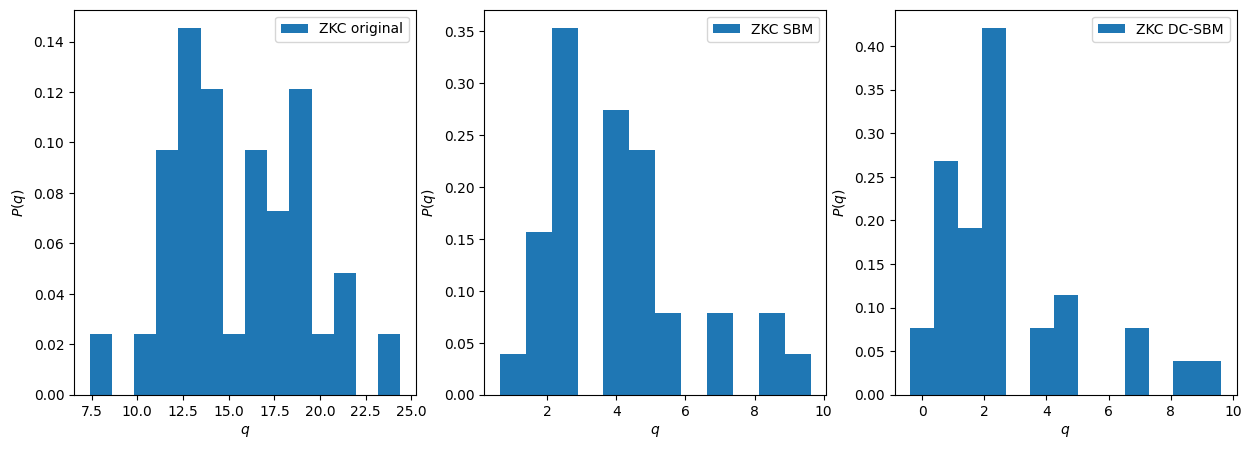

In [34]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.xlabel("$q$")
plt.ylabel('$P(q)$')
plt.hist(k, bins=14, density=True, histtype='bar',align='left', label="ZKC original")
plt.legend()

plt.subplot(1,3,2)
plt.xlabel("$q$")
plt.ylabel('$P(q)$')
plt.hist([v for v in degZKC_sbm.values()], bins=12, density=True, histtype='bar',align='left', label="ZKC SBM")
plt.legend()

plt.subplot(1,3,3)
plt.xlabel("$q$")
plt.ylabel('$P(q)$')
plt.hist([v for v in degZKC_dcsbm.values()], bins=13, density=True, histtype='bar',align='left', label="ZKC DC-SBM")
plt.legend()


plt.show()

### 4. Community structure inference using SBM and DC-SBM

For this we will use pysbm package

#### 4.1 Zachary’s Karate Club network structure with SBM

We need the graph and encapsulate the graph into a partition object with the known number of blocks. The pysbm package offers a selection of objective functions and inference methods for the stochastic block model. We run infer stochastic block models for the Zachary's Karate Club network with SBM model.

First, we will randomly assign nodes to one of the two partitions and select objective function

In [82]:
standard_partition = pysbm.NxPartition(graph=ZKC, number_of_blocks=2)
standard_objective_function = pysbm.TraditionalUnnormalizedLogLikelyhood(is_directed=False)

Standard partition shows to which community we have assigned node $i$

In [83]:
print(standard_partition)

{0: 0, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 1, 9: 1, 10: 1, 11: 1, 12: 0, 13: 1, 14: 0, 15: 1, 16: 1, 17: 0, 18: 0, 19: 1, 20: 0, 21: 0, 22: 0, 23: 1, 24: 0, 25: 1, 26: 1, 27: 1, 28: 0, 29: 1, 30: 1, 31: 1, 32: 1, 33: 0}


Ground truth communities

In [84]:
print(z)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


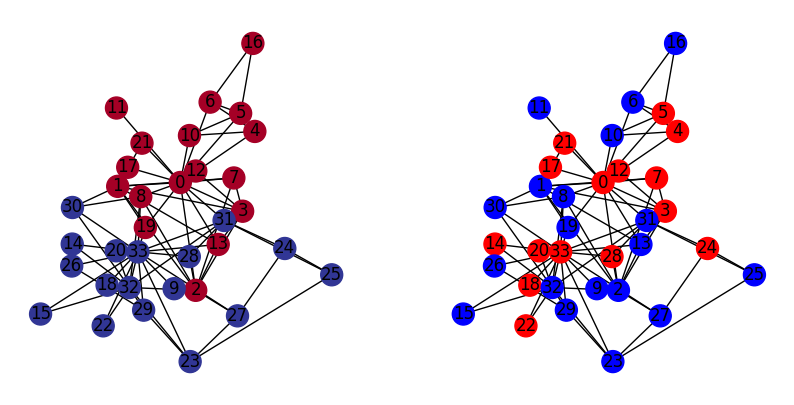

In [85]:
plt.figure(figsize =(10, 5))

plt.subplot(1,2,1)
posZKC=nx.kamada_kawai_layout(ZKC)
nx.draw_networkx_nodes(ZKC, pos=posZKC, node_size=250, cmap=plt.cm.RdYlBu, node_color=z)
nx.draw_networkx_edges(ZKC,pos=posZKC)
nx.draw_networkx_labels(ZKC,pos=posZKC)
plt.box(False)

plt.subplot(1,2,2)
nx.draw_networkx_nodes(ZKC, pos=posZKC, node_size=250,  node_color=['r' if standard_partition.get_block_of_node(node) == 0 else 'b' for node in ZKC])
nx.draw_networkx_edges(ZKC,pos=posZKC)
nx.draw_networkx_labels(ZKC,pos=posZKC)
plt.box(False)
plt.show()


As inference method we use MCMC with few steps.

In [86]:
standard_inference = pysbm.MetropolisHastingInference(ZKC, standard_objective_function, standard_partition)

Now we can infere SBM

In [87]:
standard_inference.infer_stochastic_block_model()

In [88]:
ZKC_sbm={}
ZKC_gt={}
for v in ZKC.nodes():
    c=standard_partition.get_block_of_node(v)
    if c in ZKC_sbm.keys():
        ZKC_sbm[c].add(v)
    else:
        ZKC_sbm[c]=set([v])
    if z[v] in ZKC_gt.keys():
        ZKC_gt[z[v]].add(v)
    else:
        ZKC_gt[z[v]]=set([v])

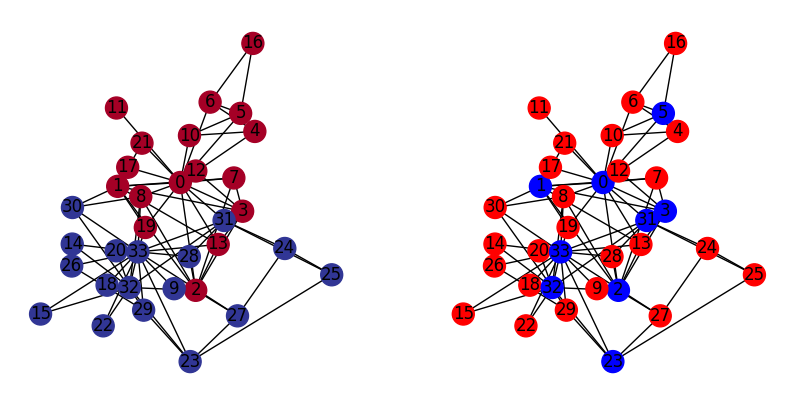

In [89]:
plt.figure(figsize =(10, 5))

plt.subplot(1,2,1)
posZKC=nx.kamada_kawai_layout(ZKC)
nx.draw_networkx_nodes(ZKC, pos=posZKC, node_size=250, cmap=plt.cm.RdYlBu, node_color=z)
nx.draw_networkx_edges(ZKC,pos=posZKC)
nx.draw_networkx_labels(ZKC,pos=posZKC)
plt.box(False)

plt.subplot(1,2,2)
nx.draw_networkx_nodes(ZKC, pos=posZKC, node_size=250,  node_color=['r' if standard_partition.get_block_of_node(node) == 0 else 'b' for node in ZKC])
nx.draw_networkx_edges(ZKC,pos=posZKC)
nx.draw_networkx_labels(ZKC,pos=posZKC)
plt.box(False)

plt.show()


#### 4.2 Zachary’s Karate Club network structure with DC-SBM

We run infer stochastic block models for the Zachary's Karate Club network with DC-SBM model.

First, we will randomly assign nodes to one of the two partitions and select objective function

In [90]:
standard_partition = pysbm.NxPartition(graph=ZKC, number_of_blocks=2)
degree_corrected_partition = pysbm.NxPartition(graph=ZKC, number_of_blocks=2, representation=standard_partition.get_representation())

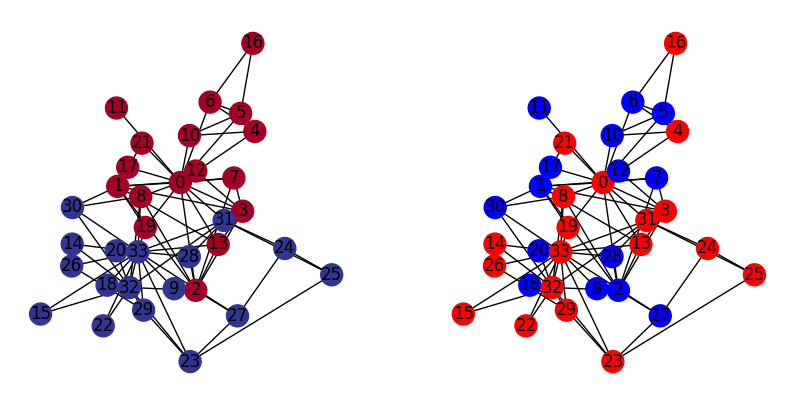

In [91]:
plt.figure(figsize =(10, 5))

plt.subplot(1,2,1)
posZKC=nx.kamada_kawai_layout(ZKC)
nx.draw_networkx_nodes(ZKC, pos=posZKC, node_size=250, cmap=plt.cm.RdYlBu, node_color=z)
nx.draw_networkx_edges(ZKC,pos=posZKC)
nx.draw_networkx_labels(ZKC,pos=posZKC)
plt.box(False)

plt.subplot(1,2,2)
nx.draw_networkx_nodes(ZKC, pos=posZKC, node_size=250,  node_color=['r' if degree_corrected_partition.get_block_of_node(node) == 0 else 'b' for node in ZKC])
nx.draw_networkx_edges(ZKC,pos=posZKC)
nx.draw_networkx_labels(ZKC,pos=posZKC)
plt.box(False)
plt.show()


In [92]:
degree_corrected_objective_function = pysbm.DegreeCorrectedUnnormalizedLogLikelyhood(is_directed=False)

In [93]:
degree_corrected_inference = pysbm.MetropolisHastingInference(ZKC, degree_corrected_objective_function, degree_corrected_partition)

In [94]:
degree_corrected_inference.infer_stochastic_block_model()

In [95]:
ZKC_dcsbm={}
ZKC_gt={}
for v in ZKC.nodes():
    c=degree_corrected_partition.get_block_of_node(v)
    if c in ZKC_dcsbm.keys():
        ZKC_dcsbm[c].add(v)
    else:
        ZKC_dcsbm[c]=set([v])
    if z[v] in ZKC_gt.keys():
        ZKC_gt[z[v]].add(v)
    else:
        ZKC_gt[z[v]]=set([v])

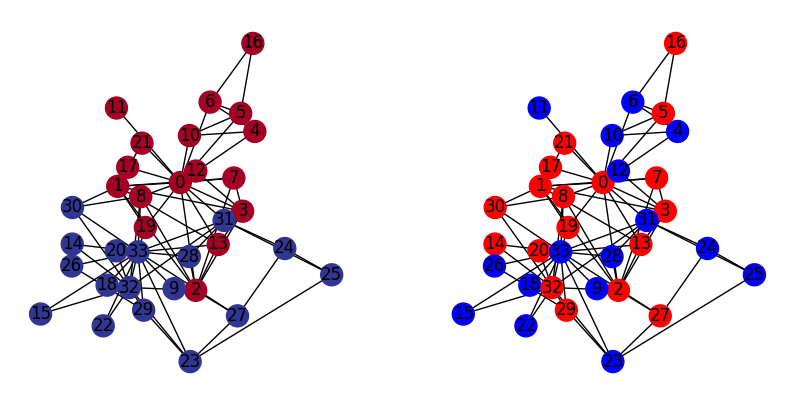

In [96]:
plt.figure(figsize =(10, 5))

plt.subplot(1,2,1)
posZKC=nx.kamada_kawai_layout(ZKC)
nx.draw_networkx_nodes(ZKC, pos=posZKC, node_size=250, cmap=plt.cm.RdYlBu, node_color=z)
nx.draw_networkx_edges(ZKC,pos=posZKC)
nx.draw_networkx_labels(ZKC,pos=posZKC)
plt.box(False)

plt.subplot(1,2,2)
nx.draw_networkx_nodes(ZKC, pos=posZKC, node_size=250,  node_color=['r' if degree_corrected_partition.get_block_of_node(node) == 0 else 'b' for node in ZKC])
nx.draw_networkx_edges(ZKC,pos=posZKC)
nx.draw_networkx_labels(ZKC,pos=posZKC)
plt.box(False)

plt.show()


**Compare partitions found with Louvain, SBM and DC-SBM using mutual information**

Source: https://github.com/satyakisikdar/NMI <br>
We have copied the function for mutual information from source code <br>
Input are two partitions of the network in the form of dictionary c_A and c_B, and network size S <br>
IDs of nodes must be the same in both partitions! Number of nodes in both partitions must be the same!

In [72]:
from math import log

def mutual_info(c_A, c_B, S):
    N_mA = len(c_A)
    N_mB = len(c_B)
    I_num = 0
    for i in c_A:
        for j in c_B:
            n_i = len(c_A[i])
            n_j = len(c_B[j])
            n_ij = len(c_A[i] & c_B[j])
            if n_ij == 0:
                continue
            log_term = log((n_ij * S) / (n_i * n_j))

            I_num += n_ij * log_term
    I_num *= -2

    I_den = 0
    for i in c_A:
        n_i = len(c_A[i])
        I_den += n_i * log(n_i / S)

    for j in c_B:
        n_j = len(c_B[j])
        I_den += n_j * log(n_j / S)

    I = I_num / I_den
    return I

In [97]:
In=mutual_info(ZKC_gt, ZKC_sbm, ZKC.number_of_nodes())
print("Mutual information for Louvain partition and SBM partition of Zachary's Karata Club networks is", In)

Mutual information for Louvain partition and SBM partition of Zachary's Karata Club networks is 0.0035021828956646513


In [99]:
In=mutual_info(ZKC_gt, ZKC_dcsbm, ZKC.number_of_nodes())
print("Mutual information for Louvain partition and DC-SBM partition of Zachary's Karata Club networks is", In)

Mutual information for Louvain partition and DC-SBM partition of Zachary's Karata Club networks is 0.09229358083593799


In [100]:
In=mutual_info(ZKC_sbm, ZKC_dcsbm, ZKC.number_of_nodes())
print("Mutual information for SBM partition and DC-SBM partition of Zachary's Karata Club networks is", In)

Mutual information for SBM partition and DC-SBM partition of Zachary's Karata Club networks is 0.021819849700644135


#### 4.3 Game of Throne network community structure with Louvain, SBM and DC-SBM

We will consider undirected GoT network

In [101]:
nodesGT=pd.read_csv("../data/game_thrones/nodes.csv")

In [102]:
nodesGT.head()

,# index,name,_pos
0,0,Aemon,"array([-6.26710367, -3.98543356])"
1,1,Grenn,"array([-6.16876976, -4.25622392])"
2,2,Samwell,"array([-6.20040749, -4.16643914])"
3,3,Aerys,"array([-6.22351778, -3.5141172 ])"
4,4,Jaime,"array([-6.08939813, -3.6398448 ])"


In [103]:
edgesGT=pd.read_csv("../data/game_thrones/edges.csv")

In [104]:
edgesGT.head()

,# source,target,weight
0,0,1,5
1,0,2,31
2,2,82,6
3,2,58,34
4,2,76,12


Load a network

In [105]:
GOT=nx.from_pandas_edgelist(edgesGT,
                                     source = '# source', 
                                     target = ' target', 
                                     create_using =nx.Graph)

In [106]:
posGOT=nx.spring_layout(GOT)

In [107]:
import networkx.algorithms.community as nx_comm

In [108]:
got_lv=nx_comm.louvain_communities(GOT)

Number of communities

In [109]:
print(len(got_lv))

7


In [110]:
GOT_lv={}
color_lv=[]
for i in range(0,len(got_lv)):
    GOT_lv[i]=set(got_lv[i])
for v in GOT.nodes():
    for c in GOT_lv.keys():
        if v in GOT_lv[c]:
            color_lv.append(c)

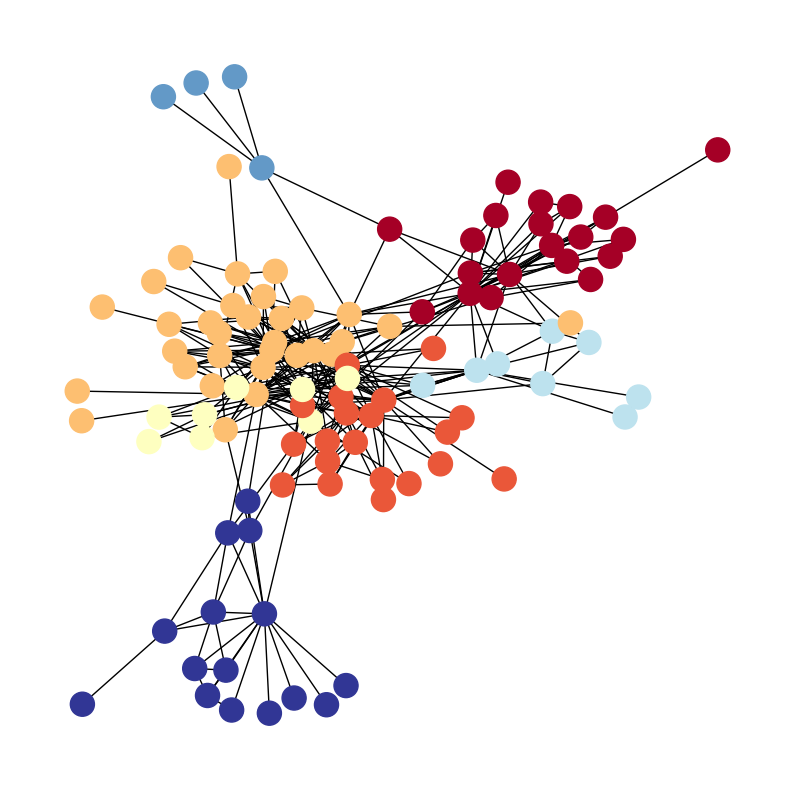

In [111]:
plt.figure(figsize =(10, 10))
nx.draw_networkx_nodes(GOT, pos=posGOT, node_size=300, cmap=plt.cm.RdYlBu, node_color=color_lv)
nx.draw_networkx_edges(GOT, pos=posGOT)
plt.box(False)
plt.show()

Now instead of MCMC algorithm we will use PeixotoInference described in Peixoto TP. Hierarchical block structures and high-resolution model selection in large networks. Physi- cal Review X. 2014; 4(1):011047. https://doi.org/10.1103/PhysRevX.4.011047

**SBM inference**

In [112]:
standard_partition = pysbm.NxPartition(graph=GOT, number_of_blocks=6)
standard_objective_function = pysbm.TraditionalUnnormalizedLogLikelyhood(is_directed=False)

In [113]:
standard_inference = pysbm.PeixotoInference(GOT, standard_objective_function, standard_partition)
standard_inference.infer_stochastic_block_model()

In [114]:
GOT_sbm={}
color_sbm=[]
for v in GOT.nodes():
    c=standard_partition.get_block_of_node(v)
    if c in GOT_sbm.keys():
        GOT_sbm[c].add(v)
    else:
        GOT_sbm[c]=set([v])
    color_sbm.append(c)

**DC-SBM inference**

In [115]:
standard_partition = pysbm.NxPartition(graph=GOT, number_of_blocks=6)
degree_corrected_partition = pysbm.NxPartition(graph=GOT, number_of_blocks=6, representation=standard_partition.get_representation())

In [116]:
degree_corrected_objective_function = pysbm.DegreeCorrectedUnnormalizedLogLikelyhood(is_directed=False)

In [117]:
degree_corrected_inference = pysbm.PeixotoInference(GOT, degree_corrected_objective_function, degree_corrected_partition)

In [118]:
degree_corrected_inference.infer_stochastic_block_model()

In [119]:
GOT_dcsbm={}
color_dcsbm=[]
for v in GOT.nodes():
    c=degree_corrected_partition.get_block_of_node(v)
    if c in GOT_dcsbm.keys():
        GOT_dcsbm[c].add(v)
    else:
        GOT_dcsbm[c]=set([v])
    color_dcsbm.append(c)

In [120]:
In=mutual_info(GOT_lv, GOT_sbm, GOT.number_of_nodes())
print("Mutual information for Louvain partition and SBM partition of Game of Throne networks is", In)

Mutual information for Louvain partition and SBM partition of Game of Throne networks is 0.5574103860714722


In [121]:
In=mutual_info(GOT_lv, GOT_dcsbm, GOT.number_of_nodes())
print("Mutual information for Louvain partition and DC-SBM partition of Game of Throne networks is", In)

Mutual information for Louvain partition and DC-SBM partition of Game of Throne networks is 0.8046990127078498


In [122]:
In=mutual_info(GOT_sbm, GOT_dcsbm, GOT.number_of_nodes())
print("Mutual information for SBM partition and DC-SBM partition of Game of Throne networks is", In)

Mutual information for SBM partition and DC-SBM partition of Game of Throne networks is 0.5980812321231157


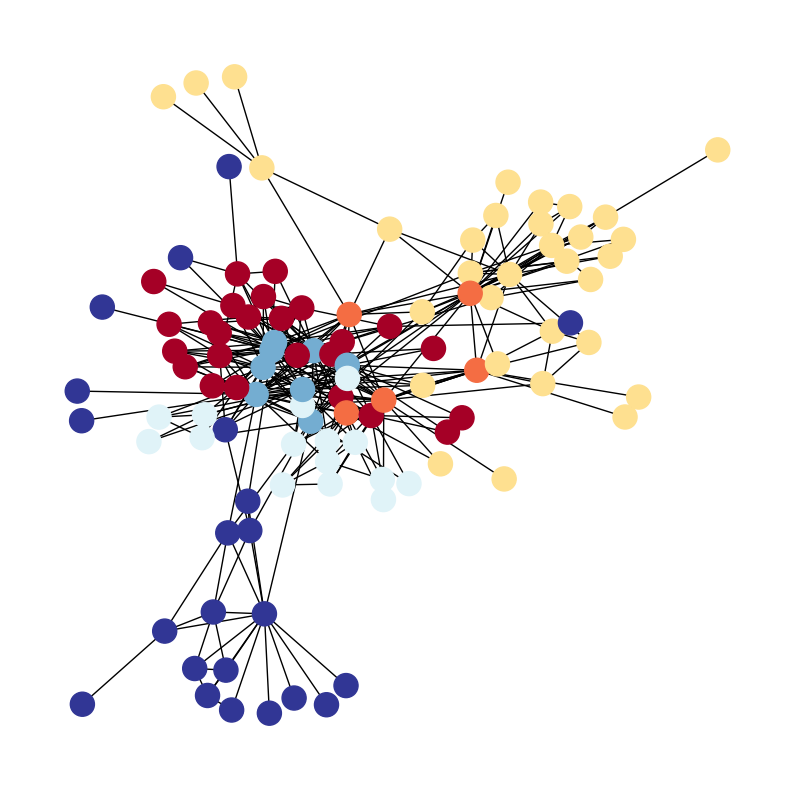

In [123]:
plt.figure(figsize =(10, 10))
nx.draw_networkx_nodes(GOT, pos=posGOT, node_size=300, cmap=plt.cm.RdYlBu, node_color=color_sbm)
nx.draw_networkx_edges(GOT,pos=posGOT)
plt.box(False)
plt.show()

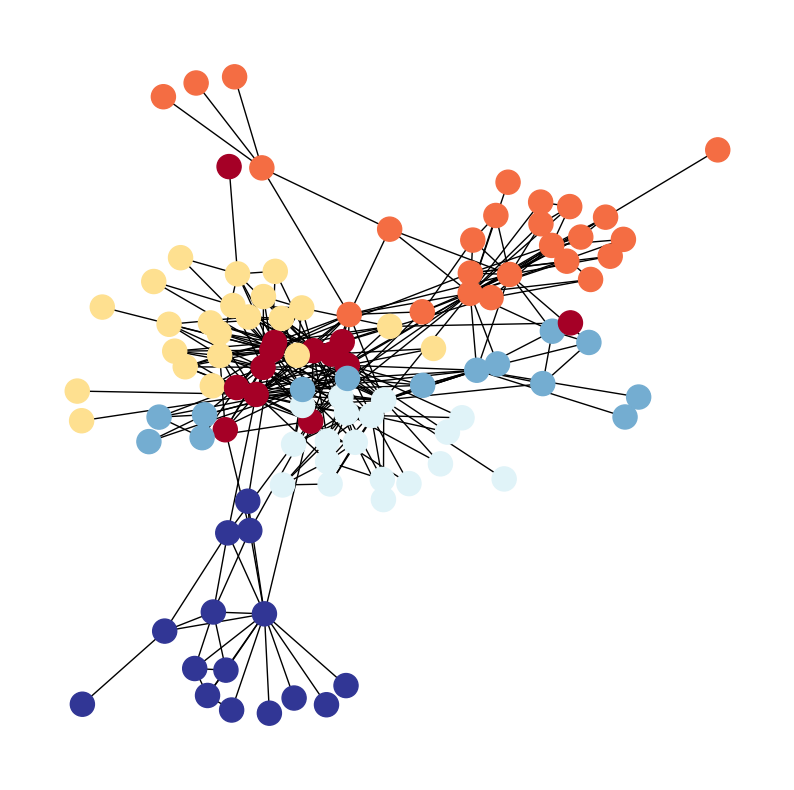

In [125]:
plt.figure(figsize =(10, 10))
nx.draw_networkx_nodes(GOT, pos=posGOT, node_size=300, cmap=plt.cm.RdYlBu, node_color=color_dcsbm)
nx.draw_networkx_edges(GOT,pos=posGOT)
plt.box(False)
plt.show()